In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def inversion_2_norm(N):
    r_inverse_cdf = lambda y: math.sqrt(y)
    theta_inverse_cdf = lambda y: 2 * y * math.pi
    polars = [(r_inverse_cdf(np.random.uniform(0,1,1)[0]), theta_inverse_cdf(np.random.uniform(0,1,1)[0])) for i in range(N)]
    coords = [(r*math.cos(theta), r*math.sin(theta)) for (r, theta) in polars]
    return coords

def inversion_1_norm(N):
    #Another norm ball that covers the 0.7-norm and is easy to sample from is 1-norm ball
    #f(|x1|) ~ 2(1-x1), F(|x1|<y) = 2y-y^2
    #f(x2|x1) = Uniform(-x1, +x1)
    x_inverse_cdf = lambda y: 1- math.sqrt(1 - y)
    x1s_1  = [x_inverse_cdf(np.random.uniform(0, 1, 1)[0]) for i in range(N/2)]
    coords = [(x1, np.random.uniform(x1-1, 1-x1, 1)[0]) for x1 in x1s_1]
    
    x1s_2 = [-x_inverse_cdf(np.random.uniform(0, 1, 1)[0]) for i in range(N/2)]
    coords_2 = [(x1, np.random.uniform(-x1-1, 1+x1, 1)[0]) for x1 in x1s_2]
    
    coords.extend(coords_2)
    return coords


def sample_p_norm(p, N, proposal=2):
    if p == 2:
        return inversion_2_norm(N)
    else:
        #Pick the proposal as (area_of_2_ball/area_of_p_ball)*P(x in 2_ball), thus always accept in the p-ball's support
        reject = lambda x1, x2: ((math.fabs(x1)**p) + (math.fabs(x2)**p))**(1/p) > 1
        if proposal == 2:
            coords = [(x1, x2) for (x1, x2) in inversion_2_norm(N) if not reject(x1, x2)]
            rejected = 1 - len(coords)/float(N)
            return coords, rejected
        elif proposal == 1:
            coords = [(x1, x2) for (x1, x2) in inversion_1_norm(N) if not reject(x1, x2)]
            rejected = 1 - len(coords)/float(N)
            return coords, rejected

Proposal       p        rejection_rate
----------------------------------------
2-ball         1.50     0.11
2-ball         0.70     0.60
1-ball         0.70     0.36


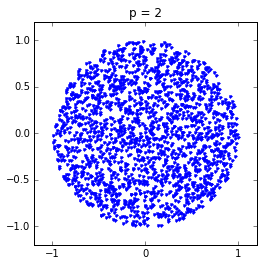

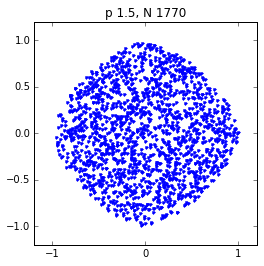

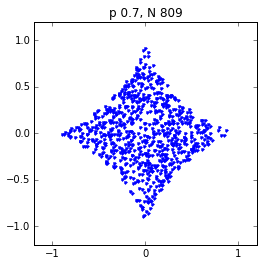

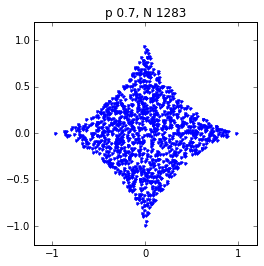

In [5]:
N = 2000

results = []
results.append(sample_p_norm(1.5, int(N)))
results.append(sample_p_norm(0.7, int(N)))
results.append(sample_p_norm(0.7, int(N), 1))

norms = [1.5, 0.7, 0.7]
proposals = ["2-ball", "2-ball", "1-ball"]
rates = [res[1] for res in results]

coords1 = sample_p_norm(2, N)
plt.figure()
plt.plot(np.array([c[0] for c in coords1]), np.array([c[1] for c in coords1]), '.')
plt.axes().set_aspect(1.0)
plt.axes().set_title('p = 2')
plt.axes().set_xlim([-1.2, 1.2])
plt.axes().set_ylim([-1.2, 1.2])
plt.axes().set_xticks([-1, 0, 1.])

for i in range(3):
    coords = results[i][0]
    args = {'title': 'p {0}, N {1}'.format(norms[i], int(N*(1-rates[i]))), 'aspect':1.0}
    plt.figure()
    plt.plot(np.array([c[0] for c in coords]), np.array([c[1] for c in coords]), '.')
    plt.axes().set_aspect(1.0)
    plt.axes().set_title('p {0}, N {1}'.format(norms[i], int(N*(1-rates[i]))))
    plt.axes().set_xlim([-1.2, 1.2])
    plt.axes().set_ylim([-1.2, 1.2])
    plt.axes().set_xticks([-1, 0, 1])

print "{prop}{s}{0}{s}{r}".format("p".ljust(4), prop = "Proposal".ljust(10), s = " "*5, r = "rejection_rate")
print "-"*40

for (p, prop, r) in zip(norms, proposals, rates):
    print "{0}{s}{1:.2f}{s}{2:.2f}".format(str(prop).ljust(10), p, r, s = " "*5)